**6.Hola Jesús. Te escribo con algunas ideas, porque en la plataforma de investigación esta mañana ha surgido una pregunta: los animales con los que trabajamos tienen marcada estacionalidad. Esto significa que su capacidad reproductiva es mejor en invierno que en verano, porque la hembra tarda 4 meses en parir, y siempre quieren parir en primavera.**

**Los machos entran en pubertad aproximadamente 4-6 meses tras su nacimiento. Esto puede influir en su calidad o supervivencia en el centro.**

**La pregunta es ¿hay alguna relación entre la fecha / mes / semana de nacimiento del año y la calidad seminal a lo largo de la vida de un individuo, o entre el momento del nacimiento y la supervivencia del macho (tiempo de estancia en el centro, cualquiera que sea la razón de salida?**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [44]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')

In [45]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [46]:
calidad_seminal_verracos = df.groupby(['COD_VERRACO'])['CALIDAD_MOVIMIENTO', 'MOTILIDAD'].mean()

In [47]:
calidad_seminal_verracos.head()

,CALIDAD_MOVIMIENTO,MOTILIDAD
COD_VERRACO,,
770,8.000000,9.000000
1048,7.571429,8.095238
1049,7.933333,8.133333
1050,6.666667,7.000000
1051,8.052632,8.526316


In [48]:
calidad_seminal_verracos = calidad_seminal_verracos.reset_index()
calidad_seminal_verracos.head()

,COD_VERRACO,CALIDAD_MOVIMIENTO,MOTILIDAD
0,770,8.000000,9.000000
1,1048,7.571429,8.095238
2,1049,7.933333,8.133333
3,1050,6.666667,7.000000
4,1051,8.052632,8.526316


In [49]:
calidad_seminal_verracos.head()

,COD_VERRACO,CALIDAD_MOVIMIENTO,MOTILIDAD
0,770,8.000000,9.000000
1,1048,7.571429,8.095238
2,1049,7.933333,8.133333
3,1050,6.666667,7.000000
4,1051,8.052632,8.526316


In [50]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

verracos = pd.read_excel('VERRACOS.xlsx')

In [51]:
verracos.head()

,CODIGO,CLASE,VERRACO,TATUAJE,CENTRO,FECHA_NACTO,FECHA_LLEGADA,FECHA_SALIDA,ACTIVO,STRESS,PROCEDENCIA,DESTINO,CAUSA_BAJA,LINEA_GEN,INICIO_AMORT,COSTE_AMORT,MESES_AMORT,COD_ANT,PROPIEDAD_CLIENTE,COD_CLIENTE,ULTIMA_AMORTIZACION,IMP_PTE_AMORTIZAR,NUM_ACTIVO_FIJO,RECLAMADO,CUARENTENA,GENETICA,RAZA2,FECHA_ENTRADA_PROD
0,828,TUUUU,406,A4V7Z,CAL,NaT,2008-01-22,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-01-22,2500,18,828,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
1,829,TUUUU,407,A2V7W,CAL,2007-03-04,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,829,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
2,830,TUUUU,408,A8V2P,CAL,2007-12-21,2008-03-06,2009-01-08,False,NaN,NaN,CARNICAS CIEZANAS,15,NaN,2008-03-06,2500,18,830,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
3,831,TUUUU,409,S7N8F,CAL,2007-03-06,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,831,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
4,832,TUUUU,410,S8N7D,CAL,2007-05-11,2008-03-06,2008-12-11,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,832,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT


**Como voy a analizar la fecha de nacimiento de cada verraco, si no se conoce la fecha elimino al verraco directamente**

In [52]:
verracos.shape

(1964, 28)

In [53]:
verracos = verracos.dropna(subset=['FECHA_NACTO'])

In [54]:
verracos['DIAS_ESTANCIA'] = (verracos['FECHA_SALIDA'] - verracos['FECHA_NACTO']).dt.days

In [55]:
verracos.head()

,CODIGO,CLASE,VERRACO,TATUAJE,CENTRO,FECHA_NACTO,FECHA_LLEGADA,FECHA_SALIDA,ACTIVO,STRESS,PROCEDENCIA,DESTINO,CAUSA_BAJA,LINEA_GEN,INICIO_AMORT,COSTE_AMORT,MESES_AMORT,COD_ANT,PROPIEDAD_CLIENTE,COD_CLIENTE,ULTIMA_AMORTIZACION,IMP_PTE_AMORTIZAR,NUM_ACTIVO_FIJO,RECLAMADO,CUARENTENA,GENETICA,RAZA2,FECHA_ENTRADA_PROD,DIAS_ESTANCIA
1,829,TUUUU,407,A2V7W,CAL,2007-03-04,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,829,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT,549.0
2,830,TUUUU,408,A8V2P,CAL,2007-12-21,2008-03-06,2009-01-08,False,NaN,NaN,CARNICAS CIEZANAS,15,NaN,2008-03-06,2500,18,830,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT,384.0
3,831,TUUUU,409,S7N8F,CAL,2007-03-06,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,831,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT,547.0
4,832,TUUUU,410,S8N7D,CAL,2007-05-11,2008-03-06,2008-12-11,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,832,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT,580.0
5,833,TUUUU,411,A7V9N,CAL,2006-11-30,2008-03-06,2009-09-24,False,NaN,NaN,MERCAMURCIA,1,NaN,2008-03-06,2500,18,833,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT,1029.0


In [56]:
verracos.shape

(1745, 29)

In [57]:
verracos['CODIGO'].min(), verracos['CODIGO'].max()

(448, 2787)

In [58]:
calidad_seminal_verracos['COD_VERRACO'].min(), calidad_seminal_verracos['COD_VERRACO'].max()

(770, 2787)

In [59]:
A = calidad_seminal_verracos.loc[:, ['COD_VERRACO', 'CALIDAD_MOVIMIENTO', 'MOTILIDAD']]
B = verracos.loc[:, ['CODIGO', 'FECHA_NACTO', 'DIAS_ESTANCIA']]

In [60]:
merged_df = pd.merge(A, B, left_on='COD_VERRACO', right_on='CODIGO')

In [61]:
merged_df.head()

,COD_VERRACO,CALIDAD_MOVIMIENTO,MOTILIDAD,CODIGO,FECHA_NACTO,DIAS_ESTANCIA
0,770,8.000000,9.000000,770,2006-09-28,840.0
1,1056,7.909091,8.242424,1056,2010-06-05,1143.0
2,1076,7.906250,8.062500,1076,2010-05-06,1127.0
3,1083,8.022727,8.545455,1083,2010-04-19,1144.0
4,1084,8.030303,8.090909,1084,2010-04-20,1143.0


In [62]:
merged_df.shape

(1293, 6)

In [63]:
merged_df['COD_VERRACO'].min(), merged_df['COD_VERRACO'].max()

(770, 2787)

In [64]:
merged_df['AÑO'] = merged_df['FECHA_NACTO'].dt.year
merged_df['MES'] = merged_df['FECHA_NACTO'].dt.month
merged_df.head(5)

,COD_VERRACO,CALIDAD_MOVIMIENTO,MOTILIDAD,CODIGO,FECHA_NACTO,DIAS_ESTANCIA,AÑO,MES
0,770,8.000000,9.000000,770,2006-09-28,840.0,2006,9
1,1056,7.909091,8.242424,1056,2010-06-05,1143.0,2010,6
2,1076,7.906250,8.062500,1076,2010-05-06,1127.0,2010,5
3,1083,8.022727,8.545455,1083,2010-04-19,1144.0,2010,4
4,1084,8.030303,8.090909,1084,2010-04-20,1143.0,2010,4


In [65]:
merged_df = merged_df.drop(['CODIGO', 'FECHA_NACTO'], axis=1)
merged_df.head()

,COD_VERRACO,CALIDAD_MOVIMIENTO,MOTILIDAD,DIAS_ESTANCIA,AÑO,MES
0,770,8.000000,9.000000,840.0,2006,9
1,1056,7.909091,8.242424,1143.0,2010,6
2,1076,7.906250,8.062500,1127.0,2010,5
3,1083,8.022727,8.545455,1144.0,2010,4
4,1084,8.030303,8.090909,1143.0,2010,4


In [66]:
df_small = merged_df.iloc[:, 1:]
df_small.head()

,CALIDAD_MOVIMIENTO,MOTILIDAD,DIAS_ESTANCIA,AÑO,MES
0,8.000000,9.000000,840.0,2006,9
1,7.909091,8.242424,1143.0,2010,6
2,7.906250,8.062500,1127.0,2010,5
3,8.022727,8.545455,1144.0,2010,4
4,8.030303,8.090909,1143.0,2010,4


In [67]:
c = df_small.corr()

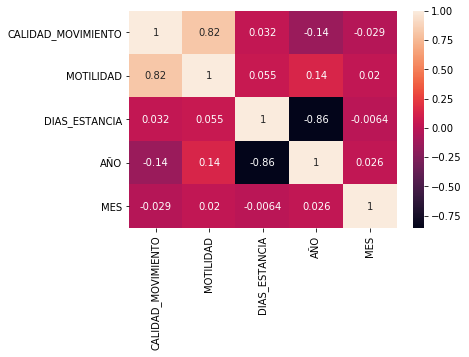

In [68]:
sns.heatmap(c, annot = True);

In [69]:
df_small.to_excel('CorrelationMatrix_01.xlsx', index=False)

In [70]:
merged_df['MEDIA_CALIDAD'] = (merged_df['CALIDAD_MOVIMIENTO'] + merged_df['MOTILIDAD'])/2

In [71]:
merged_df.head()

,COD_VERRACO,CALIDAD_MOVIMIENTO,MOTILIDAD,DIAS_ESTANCIA,AÑO,MES,MEDIA_CALIDAD
0,770,8.000000,9.000000,840.0,2006,9,8.500000
1,1056,7.909091,8.242424,1143.0,2010,6,8.075758
2,1076,7.906250,8.062500,1127.0,2010,5,7.984375
3,1083,8.022727,8.545455,1144.0,2010,4,8.284091
4,1084,8.030303,8.090909,1143.0,2010,4,8.060606


In [72]:
df_small = merged_df.iloc[:, 3:]

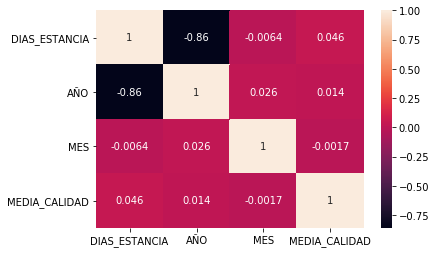

In [73]:
sns.heatmap(df_small.corr(), annot = True);